In [73]:
import pandas as pd

In [74]:
df=pd.read_csv("sui.csv")


In [75]:
df.columns = [col.capitalize() for col in df.columns]

In [76]:
palabras_permitidas = ['Germany', 'Belgium', 'Croatia', 'Denmark', 'Spain', 'France', 'Ireland', 'Latvia', 'Luxembourg', 'Netherlands', 'Sweden', 'Bulgaria', 'Slovakia', 'Estonia', 'Greece', 'Malta', 'Poland', 'Czech Republic', 'Austria', 'Cyprus', 'Slovenia', 'Finland', 'Hungary', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Norway', 'Switzerland']

# Filtrar y eliminar las filas que no contengan las palabras permitidas
df_filtrado = df[df['Country'].isin(palabras_permitidas)]

In [77]:
df_filtrado

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,Hdi for year,gdp_for_year ($),Gdp_per_capita ($),Generation
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,NaN,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,NaN,"679,289,166,858",86068,Generation Z


In [117]:
df1=df_filtrado.groupby(["Country","Year"])["Suicides_no"].sum().sort_values(ascending=False)

In [112]:
import matplotlib.pyplot as plt


In [119]:
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")
    

{'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 5   Austria  1990         1825
 9   Austria  1991         1769
 10  Austria  1992         1759
 11  Austria  1993         1704
 8   Austria  1994         1776
 6   Austria  1995         1788
 7   Austria  1996         1779
 12  Austria  1997         1592
 14  Austria  1998         1559
 15  Austria  1999         1555
 13  Austria  2000         1588
 17  Austria  2001         1489
 16  Austria  2002         1553
 18  Austria  2003         1456
 19  Austria  2004         1422
 20  Austria  2005         1399
 22  Austria  2006         1297
 25  Austria  2007         1285
 28  Austria  2008         1267
 26  Austria  2009         1278
 29  Austria  2010         1264
 24  Austria  2011         1288
 27  Austria  2012         1276
 23  Austria  2013         1291
 21  Austria  2014         13

In [99]:
selected_countries = ["Austria", "Belgium","Bulgaria", "Portugal", "Spain"]

nuevo_dataframes_by_country = {}

for country in dataframes_by_country.keys():
    if country in selected_countries:
        nuevo_dataframes_by_country[country] = dataframes_by_country[country]
    

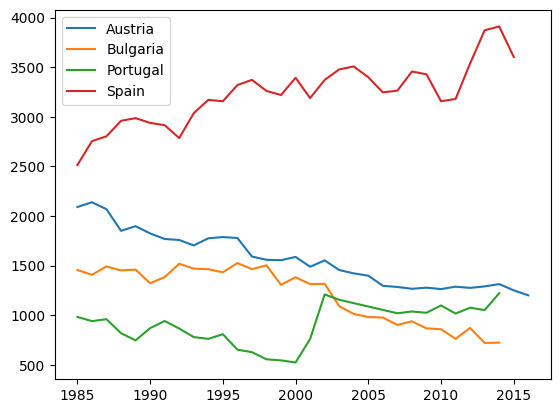

In [100]:
for country in nuevo_dataframes_by_country.keys():
    plt.plot(dataframes_by_country[country]["Year"], dataframes_by_country[country]["Suicides_no"],label=country)
plt.legend()

In [ ]:
dataframes_list = list(dataframes_by_country.values())

# Concatenar los DataFrames en uno solo
df_combined = pd.concat(dataframes_list)

# Mostrar el DataFrame resultante
print(df_combined)

        Country  Year  Suicides_no
0       Austria  1986         2139
1       Austria  1985         2091
2       Austria  1987         2069
3       Austria  1989         1898
4       Austria  1988         1851
..          ...   ...          ...
16  Switzerland  2013         1071
17  Switzerland  2012         1038
18  Switzerland  2011         1034
19  Switzerland  2014         1032
20  Switzerland  2010         1006

[774 rows x 3 columns]


AttributeError: Line2D.set() got an unexpected keyword argument 'weights'

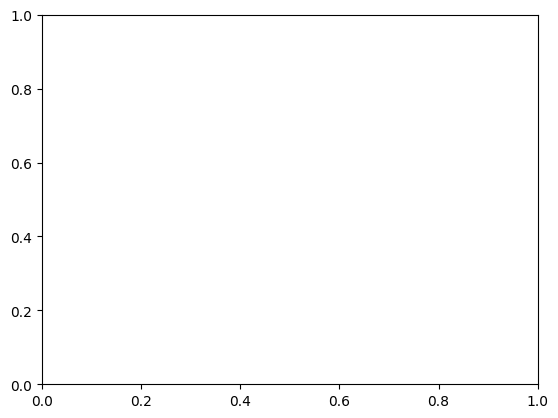

In [ ]:

# Agrupar los datos por país utilizando groupby y iterar sobre cada grupo
for country, group_df in df_combined.groupby("Country"):
    # Generar un histograma para el grupo actual
    plt.plot(group_df["Year"], weights=group_df["Suicides_no"], label=country)

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Número de suicidios")
plt.title("Histograma del número de suicidios por país")
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
dataframes_by_country['Austria']

,Country,Year,Suicides_no
0,Austria,1986,2139
1,Austria,1985,2091
2,Austria,1987,2069
3,Austria,1989,1898
4,Austria,1988,1851
5,Austria,1990,1825
6,Austria,1995,1788
7,Austria,1996,1779
8,Austria,1994,1776
9,Austria,1991,1769


In [ ]:
df1 = df_filtrado.groupby(["Country", "Year"])["Suicides_no"].sum().reset_index().rename(columns={"Suicides_no": "Suma_Suicides_no"}).sort_values(by="Suma_Suicides_no", ascending=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df1

,Country,Year,Suma_Suicides_no
260,Germany,1991,14010
259,Germany,1990,13924
261,Germany,1992,13458
264,Germany,1995,12888
263,Germany,1994,12718
...,...,...,...
478,Malta,1986,1
479,Malta,1987,1
115,Cyprus,1999,1
664,Slovakia,2007,0


In [ ]:
nuevo_df

Suicides_no
Country  Year             
Germany  1991        14010
         1990        13924
         1992        13458
         1995        12888
         1994        12718
...                    ...
Malta    1986            1
         1987            1
Cyprus   1999            1
Slovakia 2007            0
         2006            0

[774 rows x 1 columns]